## Problem 1

1) Use `numpy` to draw $1000$ random samples from a uniform distribution between $1$ and $10$, and store these samples as $x$.

2) Use matplotlib to make a histogram of these samples. Try to make this as aesthetically pleasing as possible (within reason).

3) Compute the exponential of your array $x$, and store this as $y$.

4) Make another histogram for $y$. Using the equation to transform probability distributions in `lecture_3`, write here what the theoretical pdf of $y$ is, and overplot it onto your histogram.

5) Compute the mean of $x$ and the mean of $y$. Now compute the median of $x$ and the median of $y$. How the mean and median of x and y compare to each other?

5.5468937073041005 5.560984621797921
2562.1275597142576 260.0788652001644


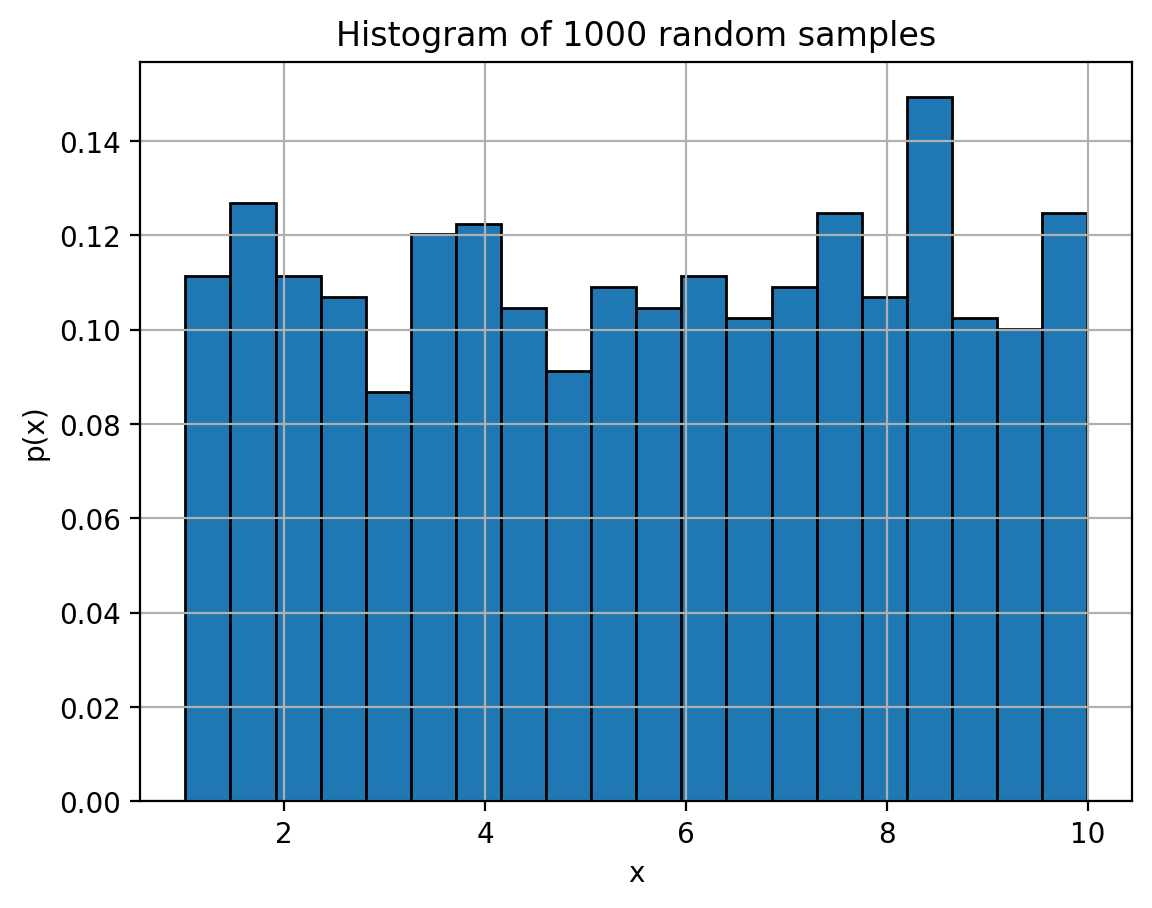

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon
%matplotlib inline
%config InlineBackend.figure_format='retina'

xmin,xmax,N=1,10,1000
x = np.random.uniform(xmin,xmax,N)
px=(1/(xmax-xmin))
y=np.exp(x)
plt.hist(x, bins=20, density=True, edgecolor='black')
#plt.hist(py, density=True,color='red')
plt.title("Histogram of 1000 random samples")
plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()

xmean=np.mean(x)
xmedian=np.median(x)
ymean=np.mean(y)
ymedian=np.median(y)
print(xmean,xmedian)
print(ymean,ymedian)

5.316881020853531 5.119209958069579
2173.497377505948 167.20325046400475


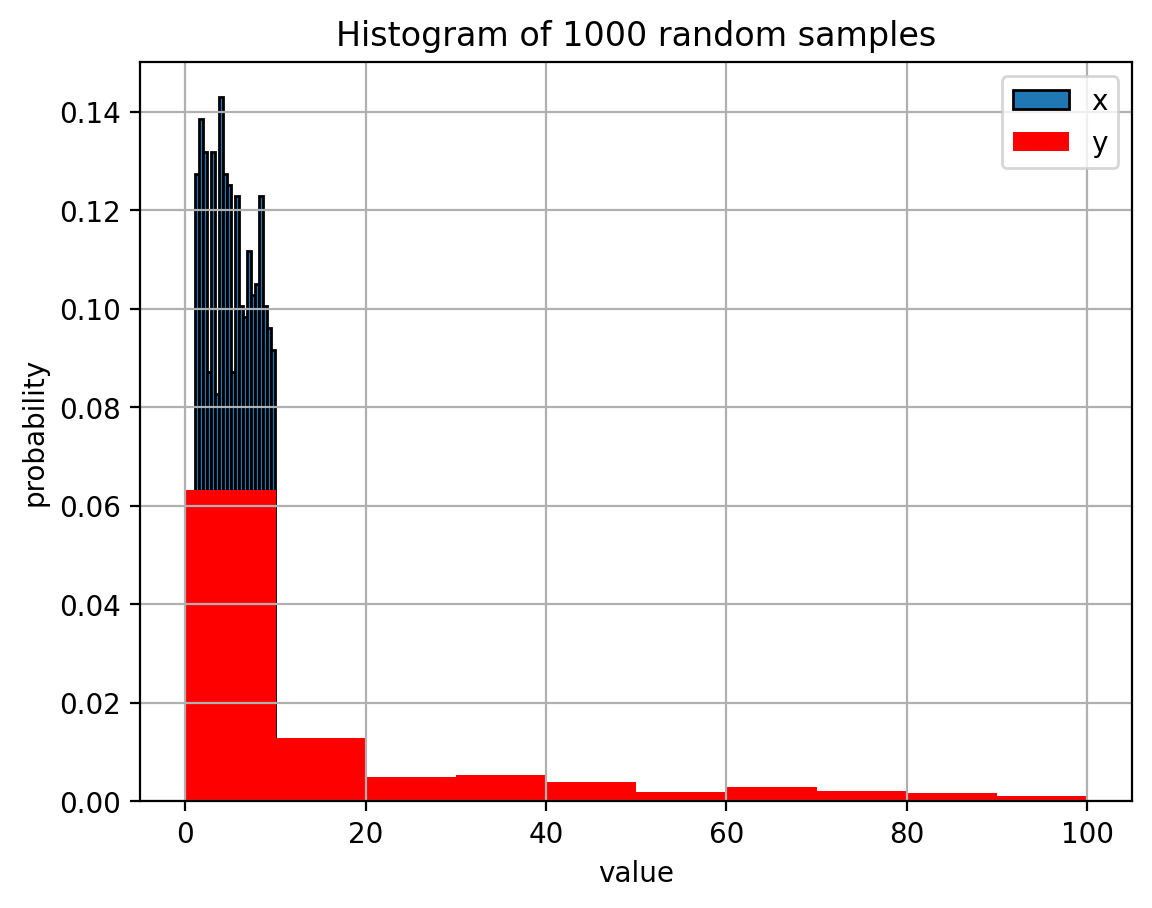

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon
%matplotlib inline
%config InlineBackend.figure_format='retina'

xmin,xmax,N=1,10,1000
x = np.random.uniform(xmin,xmax,N)
px=(1/(xmax-xmin))
y=np.exp(x)
plt.hist(x, bins=20, density=True, edgecolor='black', label="x")
#py = |(dx/dy)|px
dx = 1
dy = 1/y
dxdy = dx/dy
py = np.abs(dxdy)*px
plt.hist(py, range=[0,100],density=True,color='red', label='y')
plt.title("Histogram of 1000 random samples")
plt.xlabel("value")
plt.ylabel("probability")
plt.grid()
plt.legend()

xmean=np.mean(x)
xmedian=np.median(x)
ymean=np.mean(y)
ymedian=np.median(y)
print(xmean,xmedian)
print(ymean,ymedian)

The mean and the median for x are very similar. The mean and median of y, however, are significantly different, which should be expected as an exponential function has significantly more variance and so the mean will be considerably skewed.

## Problem 2

This question is about Monte Carlo integration. The 3$\sigma$ Gaussian confidence level takes the form 

$$ \int_{-3}^{3} \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) \,dx \approx 0.997625$$

1) Write down a python code to plot this Gaussian distribution. Can you tell what is the mean and standard daviation of this Gaussain?


2) Draw $N=10^5$ samples from a Gaussian distribution with mean 0 and standard deviation 1 and then perform Monte Carlo integration using the expression on the left hand side above. Confirm that this *approximately* matches the value given the right hand side of the equation.

3) Repeat (2) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

4) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

5) What if you had drawn N samples from a uniform distribution between $[-3, 3]$, how the accuracy of your results have changed?

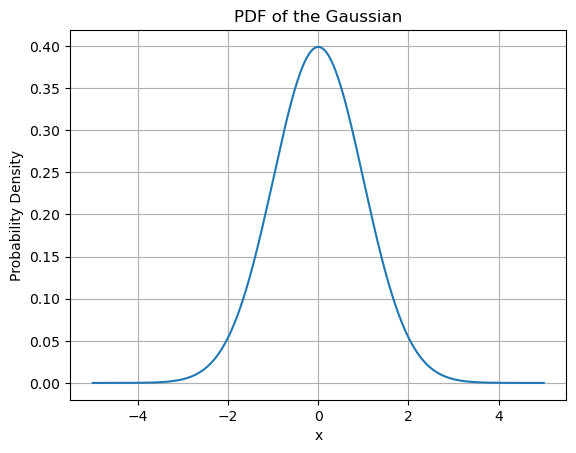

In [2]:
#1.)Using equation 3.43 from the textbook, it is clear that the standard deviation is 1 and the mean is 0.
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

distG = stats.norm(0,1)
x=np.linspace(-5,5,1000)
pdf=distG.pdf(x)

plt.plot(x,pdf,label='PDF')
plt.title('PDF of the Gaussian')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)

plt.show()


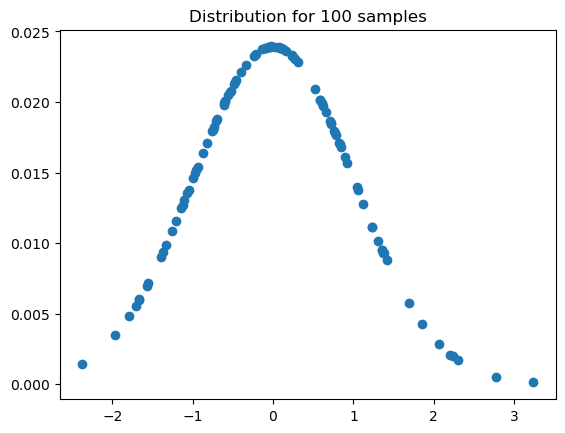

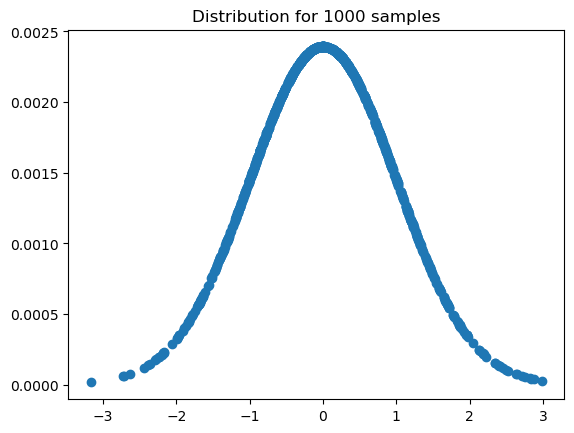

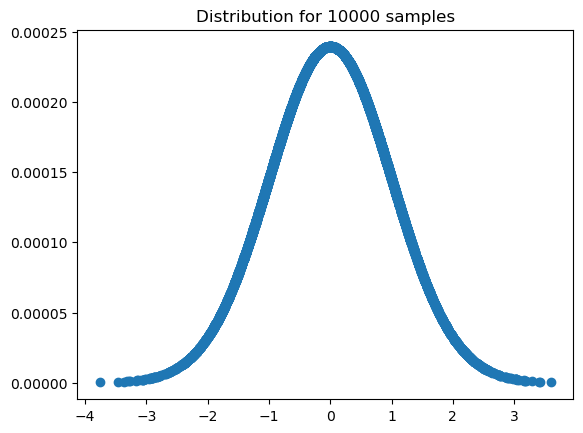

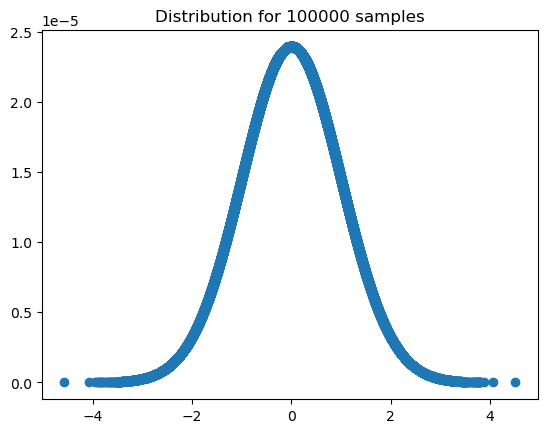

In [32]:
#2.) & #3.)
#from scipy.integrate import quad
mu = 0
sigma = 1
a = -3
b = 3

for i in range (2,6):
    N = 10**i
    x=np.random.normal(0,1,N)
    def MTC(d):
        return (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
        #cdf = quad(MTC,-3,3)
        
    MTCInt=(b-a)/N*MTC(x)
    #print("The integral from -3 to 3 for the 3sigma Gaussian with", N, " samples is:", MTCInt)
    plt.figure(i-2)
    plt.title("Distribution for %i samples" %N)
    plt.scatter(x, MTCInt)
    
    i=i+1

[0.02393643292081557, 0.0023936534169227805, 0.00023936536074702772, 2.3936536822523892e-05]
[0.001358149054914099, 1.4322364815182447e-05, 8.914500756958375e-08, 2.009656266851762e-09]


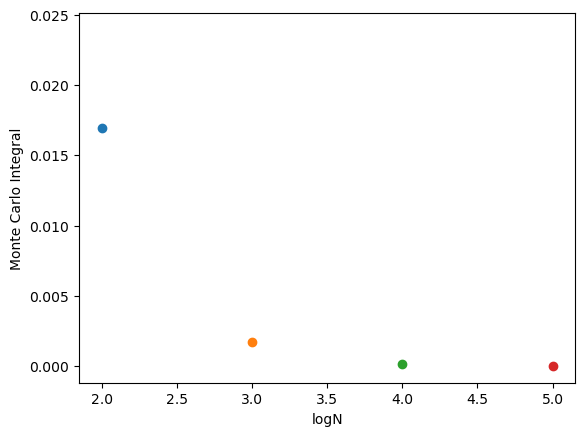

In [42]:
mu = 0
sigma = 1
a = -3
b = 3
max_arr = []
min_arr = []

fig, ax = plt.subplots()

for i in range (2,6):
    N = 10**i
    x=np.random.normal(0,1,N)
    def MTC(d):
        return (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
        #cdf = quad(MTC,-3,3)
        
    MTCInt=(b-a)/N*MTC(x)
    #plt.figure(i-2)
    #plt.title("Distribution for %i samples" %N)
    #plt.scatter(x, MTCInt)
    
    logN = np.log10(N)
    max_arr.append(np.max(MTCInt))
    min_arr.append(np.min(MTCInt))

    ax.plot(logN, np.mean(MTCInt), 'o-')
    ax.fill_between(logN,max_arr,min_arr)
    ax.set_xlabel('logN')
    ax.set_ylabel('Monte Carlo Integral')
    
    i=i+1

    #Working on trying to get this implemented. Feel like I'm almost there.
    
print(max_arr)
print(min_arr)

## Problem 3
Let x be a continuous random variable with pdf given by $$p(x)=\frac{1}{2}e^{−|x|},$$ for all $x\in\mathbb{R}$. If $y=x^2$, find the cdf of y.


### Answer 
$$cdf=\int_{-\infty}^x p(x'|\mu,\sigma)dx'$$

We need to use the method for transforming random variables.

$$p(y)=\frac{dx}{dy}*px$$

We are given that $y=x^2$. Therefore, $x=\pm\sqrt{y}$. 

We can substitute our value of x into probability of x p(x) to find the probability of y p(y). 

$p(y)=\frac{e^{-\sqrt{y}}}{4\sqrt{y}}$

$$cdf(y) = \int_{-\infty}^y p(y')dy'$$
$$       = \int_{-\infty}^y \frac{e^{-\sqrt{y'}}}{4\sqrt{y'}}dy'$$

We can set $y' = k^2$. We substitute this and get a much simpler integral.

$$ cdf(y)= \int_{-\infty}^y \frac{e^{-\sqrt{k^2}}}{4\sqrt{k^2}}dy$$
$$ = \int_{-\infty}^y \frac{e^{-k}}{2k} dk $$
$$ = \frac{1}{2}\int_{-\infty}^y e^{-k}k^{-1} dk$$
This results in the exponential integral, Ei
$$ = Ei(-k) $$
But $k=\sqrt{y}$ so
$$cdf(y) = \frac{1}{2}Ei(-\sqrt{y})$$